# Benchmarking Results

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

### 1. Load, Summarize, Insert

In [ ]:
data = pd.read_csv('../benchmarks/load_summarize_insert/results.csv')

titles = ['Summarization', 'SQL insert', 'SQL load']
data_types = ['mean_summarization_time', 'mean_insert_time', 'mean_loading_time']
xlabels = ['seconds', 'milliseconds', 'microseconds']
xaxis_scales = [1, 10**3, 10**6]

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True, tight_layout=True)

fig.suptitle('Cumulative execution time distributions')
fig.supxlabel('Execution time')
fig.supylabel('Replicates (n)')

axs_num = 0

for title, data_type, xlabel, xaxis_scale in zip(titles, data_types, xlabels, xaxis_scales):

    axs[axs_num].set_title(title)
    axs[axs_num].set_xlabel(xlabel)
    axs[axs_num].xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    axs[axs_num].hist(
        data[data_type] * xaxis_scale,
        histtype="stepfilled", 
        cumulative=1,
        color='black'
    )

    axs_num += 1

plt.show()

data.head()

### 2. Huggingface Device Map

In [ ]:
data = pd.read_csv('../benchmarks/huggingface_device_map/results.csv')
data = data.pivot(index='abstract', columns='device map strategy', values='summarization rate (abstracts/sec.)')

fig, axs = plt.subplots(1, 1, figsize=(9, 3), tight_layout=True)

axs.set_title('Huggingface device map strategy')
axs.set_xlabel('Device map')
axs.set_ylabel('Summarization rate (abstracts/sec.)')
axs.boxplot(data, labels=data.columns)

plt.show()

data.head()

### 3. Parallel Summarization

In [ ]:
data = pd.read_csv('../benchmarks/parallel_summarize/results.csv')

device_map_strategies = ['GPU', 'CPU physical cores', 'CPU hyperthreading']

fig, axs = plt.subplots(1, 1, figsize=(5, 5), tight_layout=True)

axs.set_title('Data parallel summarization')
axs.set_xlabel('Concurrent worker processes')
axs.set_ylabel('Rate (abstracts/min.)')
axs.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

for device_map_strategy in device_map_strategies:

    plot_data = data[data['device map strategy'] == device_map_strategy]
    axs.scatter(plot_data['workers'], plot_data['summarization rate (abstracts/sec.)'] * 60, label=device_map_strategy)

plt.legend(loc='upper left')
plt.show()

data.head()

### 4. SQL Insert

In [ ]:
data = pd.read_csv('../benchmarks/sql_insert/results.csv')
fig, axs = plt.subplots(1, 1, figsize=(5, 5), tight_layout=True)

axs.set_title('SQL insert strategy')
axs.set_ylabel('Insert rate (abstracts/sec.)')
axs.set_xlabel('Insertion method')
axs.tick_params(axis='x', labelrotation=45)

sns.boxplot(
    data=data, 
    x='insert strategy',
    y='insert rate (abstracts/sec.)',
    hue='abstracts',
    ax=axs
)

plt.show()

data.head()

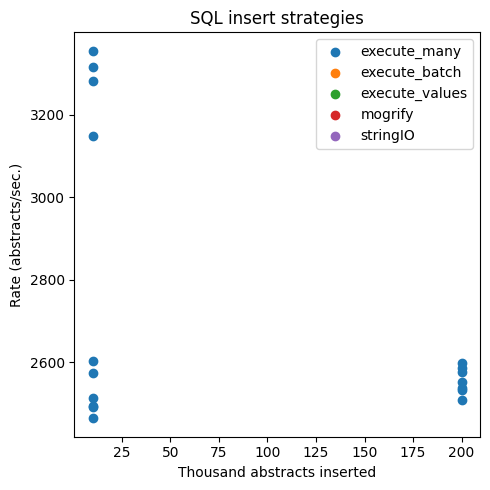

,abstracts,insert time (sec.),insert rate (abstracts/sec.),insert strategy,replicate
0,10000,4.011200,2493.019576,execute_many,1
1,10000,4.058270,2464.103887,execute_many,2
2,10000,3.886749,2572.844594,execute_many,3
3,10000,4.013787,2491.413000,execute_many,4
4,10000,3.047673,3281.191670,execute_many,5


In [25]:
data = pd.read_csv('../benchmarks/sql_insert/results.csv')

insert_strategies = ['execute_many', 'execute_batch', 'execute_values', 'mogrify', 'stringIO']

fig, axs = plt.subplots(1, 1, figsize=(5, 5), tight_layout=True)

axs.set_title('SQL insert strategies')
axs.set_xlabel('Thousand abstracts inserted')
axs.set_ylabel('Rate (abstracts/sec.)')
axs.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

for insert_strategy in insert_strategies:

    plot_data = data[data['insert strategy'] == insert_strategy]
    axs.scatter(plot_data['abstracts'] / 1000, plot_data['insert rate (abstracts/sec.)'], label=insert_strategy)

plt.legend(loc='upper right')
plt.show()

data.head()